In [8]:
import pandas as pd
import numpy as np
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
#한글폰트 가져오기
from matplotlib import rc
rc('font', family='NanumGothic')

import koreanize_matplotlib
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

# 결측치 확인하는 라이브러리
import missingno as msno

import seaborn.objects as so

import chardet

In [9]:
path = 'C:/Users/조현서/Desktop/비어플신입세션/프로젝트_1'
os.chdir(path)
print(os.getcwd())

C:\Users\조현서\Desktop\비어플신입세션\프로젝트_1


In [10]:
medical_ex = pd.read_csv('C:/Users/조현서/Desktop/비어플신입세션/프로젝트_1/국민건강보험공단_건강검진정보_2023.csv', encoding='cp949')
print(medical_ex)

        기준년도  가입자일련번호  시도코드  성별코드  연령대코드(5세단위)  신장(5cm단위)  체중(5kg단위)  허리둘레  \
0       2023    34735    46     2            9        155         70  92.0   
1       2023  4105118    11     1           17        160         55  86.0   
2       2023   362482    36     2           13        150         65  96.0   
3       2023   653166    11     1           13        160         70  85.0   
4       2023  4152237    41     1           12        165         65  84.5   
...      ...      ...   ...   ...          ...        ...        ...   ...   
999995  2023  3265034    26     1            8        170         65  78.0   
999996  2023  1421865    41     1           10        165         80  96.1   
999997  2023  3889375    41     2           11        155         65  87.0   
999998  2023  2618086    41     2            7        160         55  69.0   
999999  2023  1279122    31     2           12        160         50  75.0   

        시력(좌)  시력(우)  ...  혈청지피티(ALT)  감마지티피  흡연상태  음주여부  구강검진수

### 국민건강정보데이터 건강검진정보
- (범위) 2002년부터 1년 단위로 국민건강보험 가입자 중 1백만 명을 무작위 선별하여 진료내역, 의약품처방내역, 건강검진결과에 대한 데이터 생성
- (개념) 20세 이상의 국민건강보험 직장가입자와 피부양자, 지역가입자 세대주 및 세대원 약 1백만 명의 일반건강검진 및 구강검진 결과로 구성

### 변수 설명
- 기준년도 : 해당 정보의 기준년도
- 가입자 일련번호 : 해당가입자에 부여한 일련번호
- 시도코드 : 해당 수진자 거주지의 시도코드
- 성별코드: 해당 정보 대상자의 성별을 제공함 1(남자), 2(여자)
- 연령대 코드(5세단위) : 기준년도에 수진자의 나이를 5세 단위로 그룹화(범주화)하여 구분한 코드
- 신장(5Cm단위) : 검진자의 키(5CM 단위)
    - 예) 100~104CM -> 100CM
- 체중(5Kg 단위) : 검진자의 몸무게(5KG 단위)
    - 예) 25~29KG -> 25KG
- 허리둘레 : 검진자의 허리둘레
- 시력(좌) : 수검자의 좌측 눈의 시력
    - 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기
- 시력(우) : 수검자의 우측 눈의 시력
    - 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기
- 청력(좌) : 수검자의 좌측 귀의 청력
    - 1: 정상, 2:질환의심, 3: 측정 불가
- 청력(우) : 수검자의 우측 귀의 청력
    - 1: 정상, 2:질환의심, 3: 측정 불가
- 수축기 혈압 : 검진자의 최고 혈압으로 심장이 수축해서 강한 힘으로 혈액을 동맥에 보낼 때의 혈관 내압
- 이완기 혈압 : 검진자의 최저 혈압으로 심장의 완기시의 혈압
- 식전혈당(공복혈당) : 검진자 식사 전 혈당(혈액 100ml당 함유 되어 있는 포도당의 농도) 수치
- 총 콜레스테롤 : 혈청 중의 에스텔형, 비에스테형(유리)콜레스테롤의 합 ­ 정상치는 150~250mg/dL 약 1/3이 비에스텔형(유리)콜레스테롤이며 나머지가 에스텔형
- 트리글리세라이드: 단순지질 혹은 중성지질을 뜻함 ­ 글리세롤에 3분자 지방산이 에스테르 합한 것으로서 자연계에서 찾아낼 수 있는 지방유도체 가운데 가장 분포가 넓음 ­ 정상치는 30~135mg/dL(0.34~1.52-mmol/ℓ)
    - 트리클리세라이드항목은 2008년부터 건강검진 문진항목으로 추가되었기 때문에, 기준년도가 2002년부터 2007년까지 인 경우 해당 항목 값이 결측 처리되어 제공됨
- HDL 콜레스테롤 : HDL(고밀도 리포단백질)에 포함되는 콜레스테롤 ­ 작은 입자의 콜레스테롤로 세포에 이끌려간 콜레스테롤을 간으로 돌려주고 혈관 벽에 쌓인 나쁜 콜레스테롤을 없애는 역할을 하는 성분 ­ 정상치는 30~65mg/dL
    - HDL콜레스테롤 항목은 2008년부터 건강검진 문진항목으로 추가되었기 때문에, 기준년도가 2002년부터 2007년까지 인 경우 해당 항목 값이 결측 처리되어 제공됨
- LDL 콜레스테롤 : LDL(저밀도 리포단백질)에 함유된 콜레스테롤 ­ 입자가 매우 큰 콜레스테롤로 양이 과도하게 증가할 경우,혈관벽에 쌓여서 동맥경화나 각종 질병을 야기 하는 성분 ­ 170mg/dL 이상일 경우 일반적으로 고LDL혈증으로 봄
    - LDL콜레스테롤 항목은 2008년부터 건강검진 문진항목으로 추가되었기 때문에,기준년도가 2002년부터 2007년까지 인 경우 해당 항목 값이 결측 처리되어 제공됨
- 혈색소 : 혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수행
- 요단백 : 소변에 단백질이 섞여 나오는 것 ­ - 1(-), 2(±), 3(+1), 4(+2), 5(+3), 6(+4)로 표기됨
- 혈청크레아티닌 : 크레아티닌은 크레아틴의 탈수물로 내인성 단백대사의 종말산물로서 신장에서 배설되고 그 증감은 음식물에 관계없이 근육의 발육과 운동에 관계함 ­ 혈청크레아티닌 농도는 신기능장애에 의해 증량함 ­ 정상치 0.8~1.7mg/dL
    - 혈청크레아티닌 항목은 2008년부터 건강검진 문진항목으로 추가되었기 때문에, 기준년도가 2002년부터 2007년까지 인 경우 해당 항목 값이 결측 처리되어 제공됨
- (혈청지오티)AST : 간 기능을 나타내는 혈액검사상의 수치, 간세포 이외에 심장, 신장, 뇌 , 근육 등에도 존재하는 효소로 이러한 세포들이 손상을 받는 경우 농도가 증가함 ­ - 정상치 0~40IU/L
- (혈청지오티)ALT : 간 기능을 나타내는 혈액검사상의 수치, ALT는 주로 간세포 안에 존재하는 효소로, 간세포가 손상을 받는 경우 농도가 증가함 ­ - 정상치 0~40IU/L
- 감마 지티피 : 간 기능을 나타내는 혈액검사상의 수치, 간 내의 쓸개관(담관)에 존재하는 효소로 글루타민산을 외부에 펩티드나 아미노산 등으로 옮기는 작용을 함, 쓸개즙(담즙) 배설 장애, 간세포 장애 발생 시 혈중에 증가하게 됨 ­ - 정상치 남성 1163IU/L, 여성 835IU/L
- 흡연상태 : 해당 수검자의 흡연 상태 여부 ­ - 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
- 음주여부 : 해당 수검자의 음주 상태 여부 ­ - 0(마시지 않는다), 1(마신다) ­ - N(마시지 않는다), Y(마신다)
- 구강검진 수검여부 : 해당 검진자가 구강검진을 선택하여 검진하였는지 여부에 대한 항목 ­ - 0(미수검), 1(수검) ­ - N(미수검), Y(수검)
- 치아우식증유무 : 해당 수검자의 치아우식증 유무에 대한 항목 ­ - 0(없음), 1(있음)
- 결손치 유무 :  해당 수검자의 결손치(다양한 원인(우식치주병,발치 등)으로 인하여 치열에서 탈락한 치아) 존재 유무에 대한 항목
  - 0(없음), 1(있음)
 ※ 2009년부터 검진항목 제외
- 치아마모증 유무 : 해당 수검자의 치아마모증 유무에 대한 항목
    - 0(없음), 1(있음)
 ※ 2014년부터 검진항목 제외
 - 제3대구치(사랑니)이상 : 해당 수검자의 제3대구치(사랑니)에 대한 이상 유무
    - 0(없음), 1(있음)
 ※ 2014년부터 검진항목 제외
- 치석 : 해당 수검자의 치석 여부
    - 0(없음), 1(있음) -  N(없음), Y(있음)

In [8]:
medical_ex

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023,3265034,26,1,8,170,65,78.0,1.2,1.0,...,13.0,22.0,1.0,1.0,1,0.0,NaN,NaN,NaN,1.0
999996,2023,1421865,41,1,10,165,80,96.1,0.9,1.2,...,65.0,160.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999997,2023,3889375,41,2,11,155,65,87.0,0.5,0.7,...,26.0,25.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999998,2023,2618086,41,2,7,160,55,69.0,1.0,1.2,...,20.0,16.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [9]:
medical_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

1000000개의 관측치, 33개의 특성으로 구성

In [11]:
medical_ex.isnull().sum() 

기준년도                   0
가입자일련번호                0
시도코드                   0
성별코드                   0
연령대코드(5세단위)            0
신장(5cm단위)              0
체중(5kg단위)              0
허리둘레                 411
시력(좌)                184
시력(우)                177
청력(좌)                137
청력(우)                138
수축기혈압               5747
이완기혈압               5747
식전혈당(공복혈당)          5814
총콜레스테롤            661394
트리글리세라이드          661394
HDL콜레스테롤          661394
LDL콜레스테롤          667247
혈색소                 5817
요단백                11156
혈청크레아티닌             5814
혈청지오티(AST)          5816
혈청지피티(ALT)          5816
감마지티피               5813
흡연상태                  89
음주여부                  56
구강검진수검여부               0
치아우식증유무           653152
결손치 유무           1000000
치아마모증유무          1000000
제3대구치(사랑니) 이상    1000000
치석                653152
dtype: int64

<Axes: >

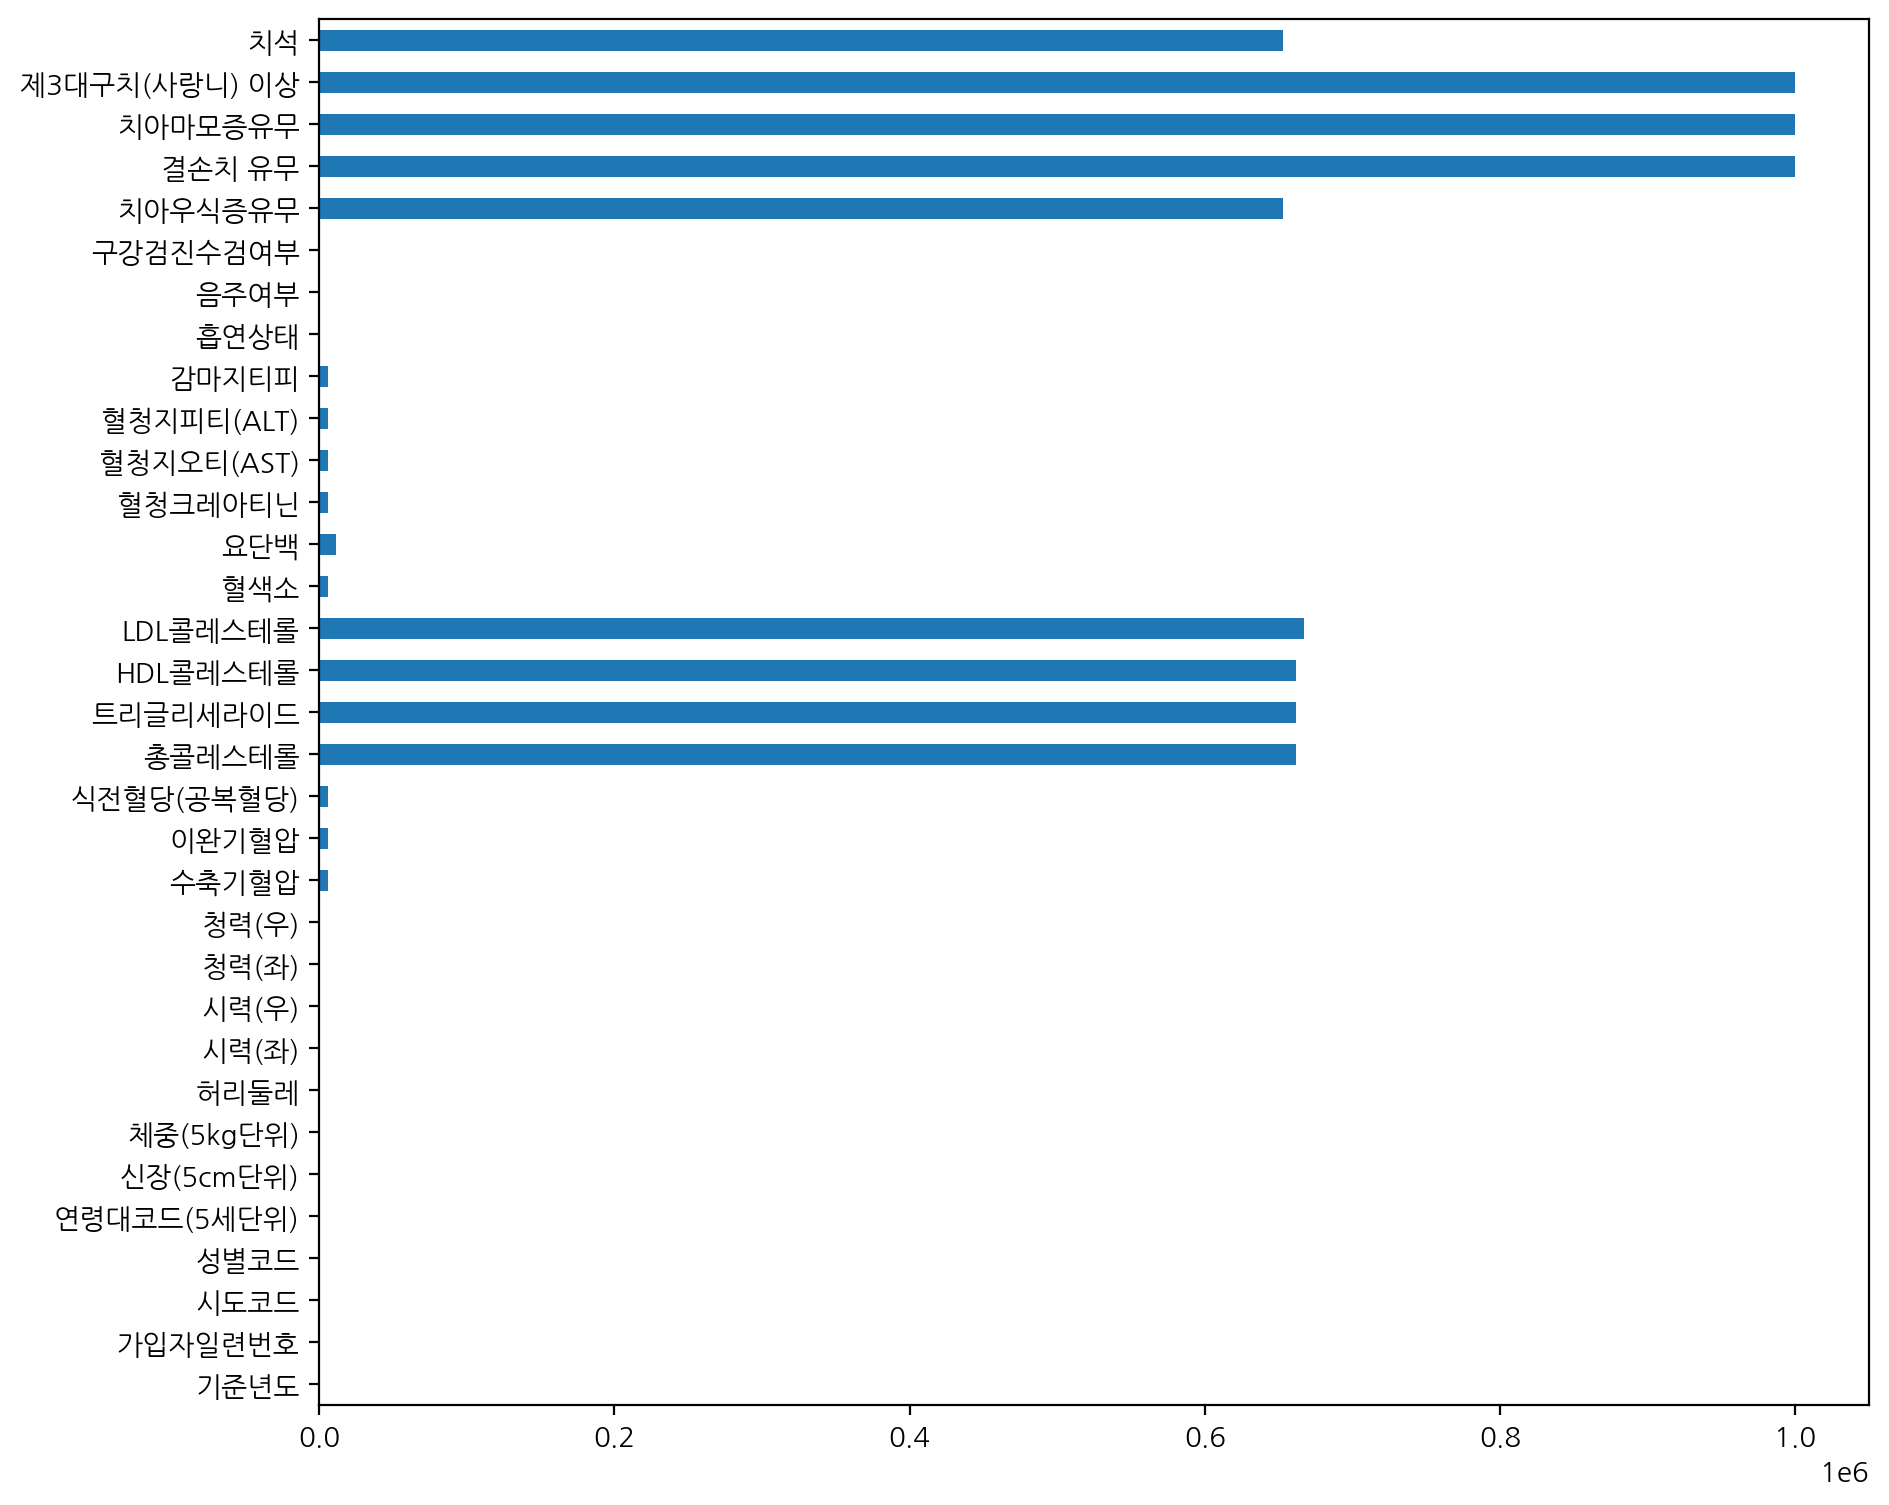

In [13]:
medical_ex.isnull().sum().plot.barh(figsize=(10,9))

결측치 확인 결과, 치아 관련 변수들과 콜레스테롤 관련 변수들은 절반 이상이 결측치.
- 영양제 데이터셋에 치아 관련 영양제들이 존재하지 않기 때문에 치아 관련 변수들은 제거 가능
- 콜레스테롤 결측치는 처리 방안 고민 필요

In [6]:
# 각 특성의 유니크 값 개수 확인
data_unique_cnt = []
data_unique = []
for i in medical_ex.columns.values:
    data_unique_cnt.append(len(medical_ex[i].unique()))
    data_unique.append(medical_ex[i].unique())
unique_train = pd.DataFrame()
unique_train['Columns'] = list(medical_ex.columns)
unique_train['Unique_value_Count'] = data_unique_cnt
unique_train['Unique_value'] = data_unique

unique_train

,Columns,Unique_value_Count,Unique_value
0,기준년도,1,[2023]
1,가입자일련번호,1000000,"[34735, 4105118, 362482, 653166, 4152237, 3587..."
2,시도코드,17,"[46, 11, 36, 41, 26, 30, 44, 49, 28, 29, 48, 4..."
3,성별코드,2,"[2, 1]"
4,연령대코드(5세단위),14,"[9, 17, 13, 12, 5, 7, 6, 10, 18, 15, 8, 16, 11..."
5,신장(5cm단위),14,"[155, 160, 150, 165, 170, 180, 175, 145, 185, ..."
6,체중(5kg단위),22,"[70, 55, 65, 50, 75, 80, 85, 90, 60, 105, 45, ..."
7,허리둘레,815,"[92.0, 86.0, 96.0, 85.0, 84.5, 69.2, 80.5, 91...."
8,시력(좌),24,"[1.2, 0.9, 1.0, 1.5, 0.6, 0.4, 0.8, 2.0, 0.3, ..."
9,시력(우),25,"[1.2, 9.9, 0.8, 1.5, 1.0, 0.7, 0.6, 0.5, 0.9, ..."


- 범주형 특성 : 시도코드, 성별 코드, 청력(좌), 청력(우), 흡연상태, 음주여부, 구강검진 수검여부,치아우식증유무, 결손치유무, 결손치유무, 치아마모증유무, 제3대구치(사랑니) 이상
- 수치형 특성 : 연령대 코드(5세단위), 신장(5Cm단위), 체중(5Kg 단위), 허리둘레, 시력(좌), 시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,(혈청지오티)AST, (혈청지오티)ALT, 감마 지티피

'기준년도'는 전부 2023으로 같으므로 칼럼 제거. 개개인 식별 불필요하므로 '시도코드'와 '가입자일련번호' 칼럼 제거.

결손치 유무, 치아마모증유무, 제3대구치(사랑니) 이상변수는 전부 [nan] 이므로 칼럼 제거 가능. 또한, 영양제 데이터셋에 치아 관련 영양제들은 없으므로, 치아 관련 칼럼들 전부 제거 가능.

In [11]:
# 필요없는 열 제거
missing_cols = ["기준년도", "가입자일련번호", "시도코드", "치아우식증유무","결손치 유무","치아마모증유무","제3대구치(사랑니) 이상","구강검진수검여부","치석","총콜레스테롤","트리글리세라이드","HDL콜레스테롤","LDL콜레스테롤"]
medical_ex = medical_ex.drop(missing_cols, axis = "columns")

### 타켓층 -> 20대로 결정
- 영양제에 대한 관심도는 가장 낮으며, 모바일 사용량은 높음(추천시스템 타켓층으로 적합)
- 같은 연령대로 공감대 형성

In [12]:
filtered_ex = medical_ex[medical_ex['연령대코드(5세단위)'].isin([5, 6])]
print(filtered_ex.head())

    성별코드  연령대코드(5세단위)  신장(5cm단위)  체중(5kg단위)  허리둘레  시력(좌)  시력(우)  청력(좌)  청력(우)  \
5      2            5        170         50  69.2    1.0    1.2    1.0    1.0   
7      1            6        170         75  91.0    0.9    0.8    1.0    1.0   
11     2            6        155         55  74.4    1.2    1.2    1.0    1.0   
22     2            5        165         70  79.0    1.0    1.0    1.0    1.0   
33     1            5        175         75  76.0    1.2    1.5    1.0    1.0   

    수축기혈압  이완기혈압  식전혈당(공복혈당)   혈색소  요단백  혈청크레아티닌  혈청지오티(AST)  혈청지피티(ALT)  \
5    92.0   60.0        93.0  12.2  1.0      0.6        16.0        11.0   
7   120.0   69.0        92.0  14.9  1.0      0.7        31.0        48.0   
11  109.0   67.0        90.0  13.7  1.0      0.6        12.0         8.0   
22  152.0   91.0       114.0  13.7  1.0      0.7        21.0        25.0   
33  110.0   70.0        96.0  14.9  1.0      1.2        28.0        21.0   

    감마지티피  흡연상태  음주여부  
5    12.0   1.0   1.0  
7    16.

In [7]:
filtered_ex.isna().sum()

성별코드             0
연령대코드(5세단위)      0
신장(5cm단위)        0
체중(5kg단위)        0
허리둘레            56
시력(좌)           19
시력(우)           19
청력(좌)            7
청력(우)            7
수축기혈압            2
이완기혈압            2
식전혈당(공복혈당)       4
혈색소              4
요단백            525
혈청크레아티닌          4
혈청지오티(AST)       4
혈청지피티(ALT)       4
감마지티피            4
흡연상태             7
음주여부             1
dtype: int64

In [6]:
filtered_ex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104819 entries, 5 to 999993
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   성별코드         104819 non-null  int64  
 1   연령대코드(5세단위)  104819 non-null  int64  
 2   신장(5cm단위)    104819 non-null  int64  
 3   체중(5kg단위)    104819 non-null  int64  
 4   허리둘레         104763 non-null  float64
 5   시력(좌)        104800 non-null  float64
 6   시력(우)        104800 non-null  float64
 7   청력(좌)        104812 non-null  float64
 8   청력(우)        104812 non-null  float64
 9   수축기혈압        104817 non-null  float64
 10  이완기혈압        104817 non-null  float64
 11  식전혈당(공복혈당)   104815 non-null  float64
 12  총콜레스테롤       17720 non-null   float64
 13  트리글리세라이드     17720 non-null   float64
 14  HDL콜레스테롤     17720 non-null   float64
 15  LDL콜레스테롤     17421 non-null   float64
 16  혈색소          104815 non-null  float64
 17  요단백          104294 non-null  float64
 18  혈청크레아티닌      104815 non-null 

In [7]:
# 범주형 특성
categorical = ['성별코드', '청력(좌)', '청력(우)', '흡연상태', '음주여부']

# 수치형 특성
quantitative = ['연령대코드(5세단위)','신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)','수축기혈압','이완기혈압','식전혈당(공복혈당)','혈색소','요단백','혈청크레아티닌','혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']

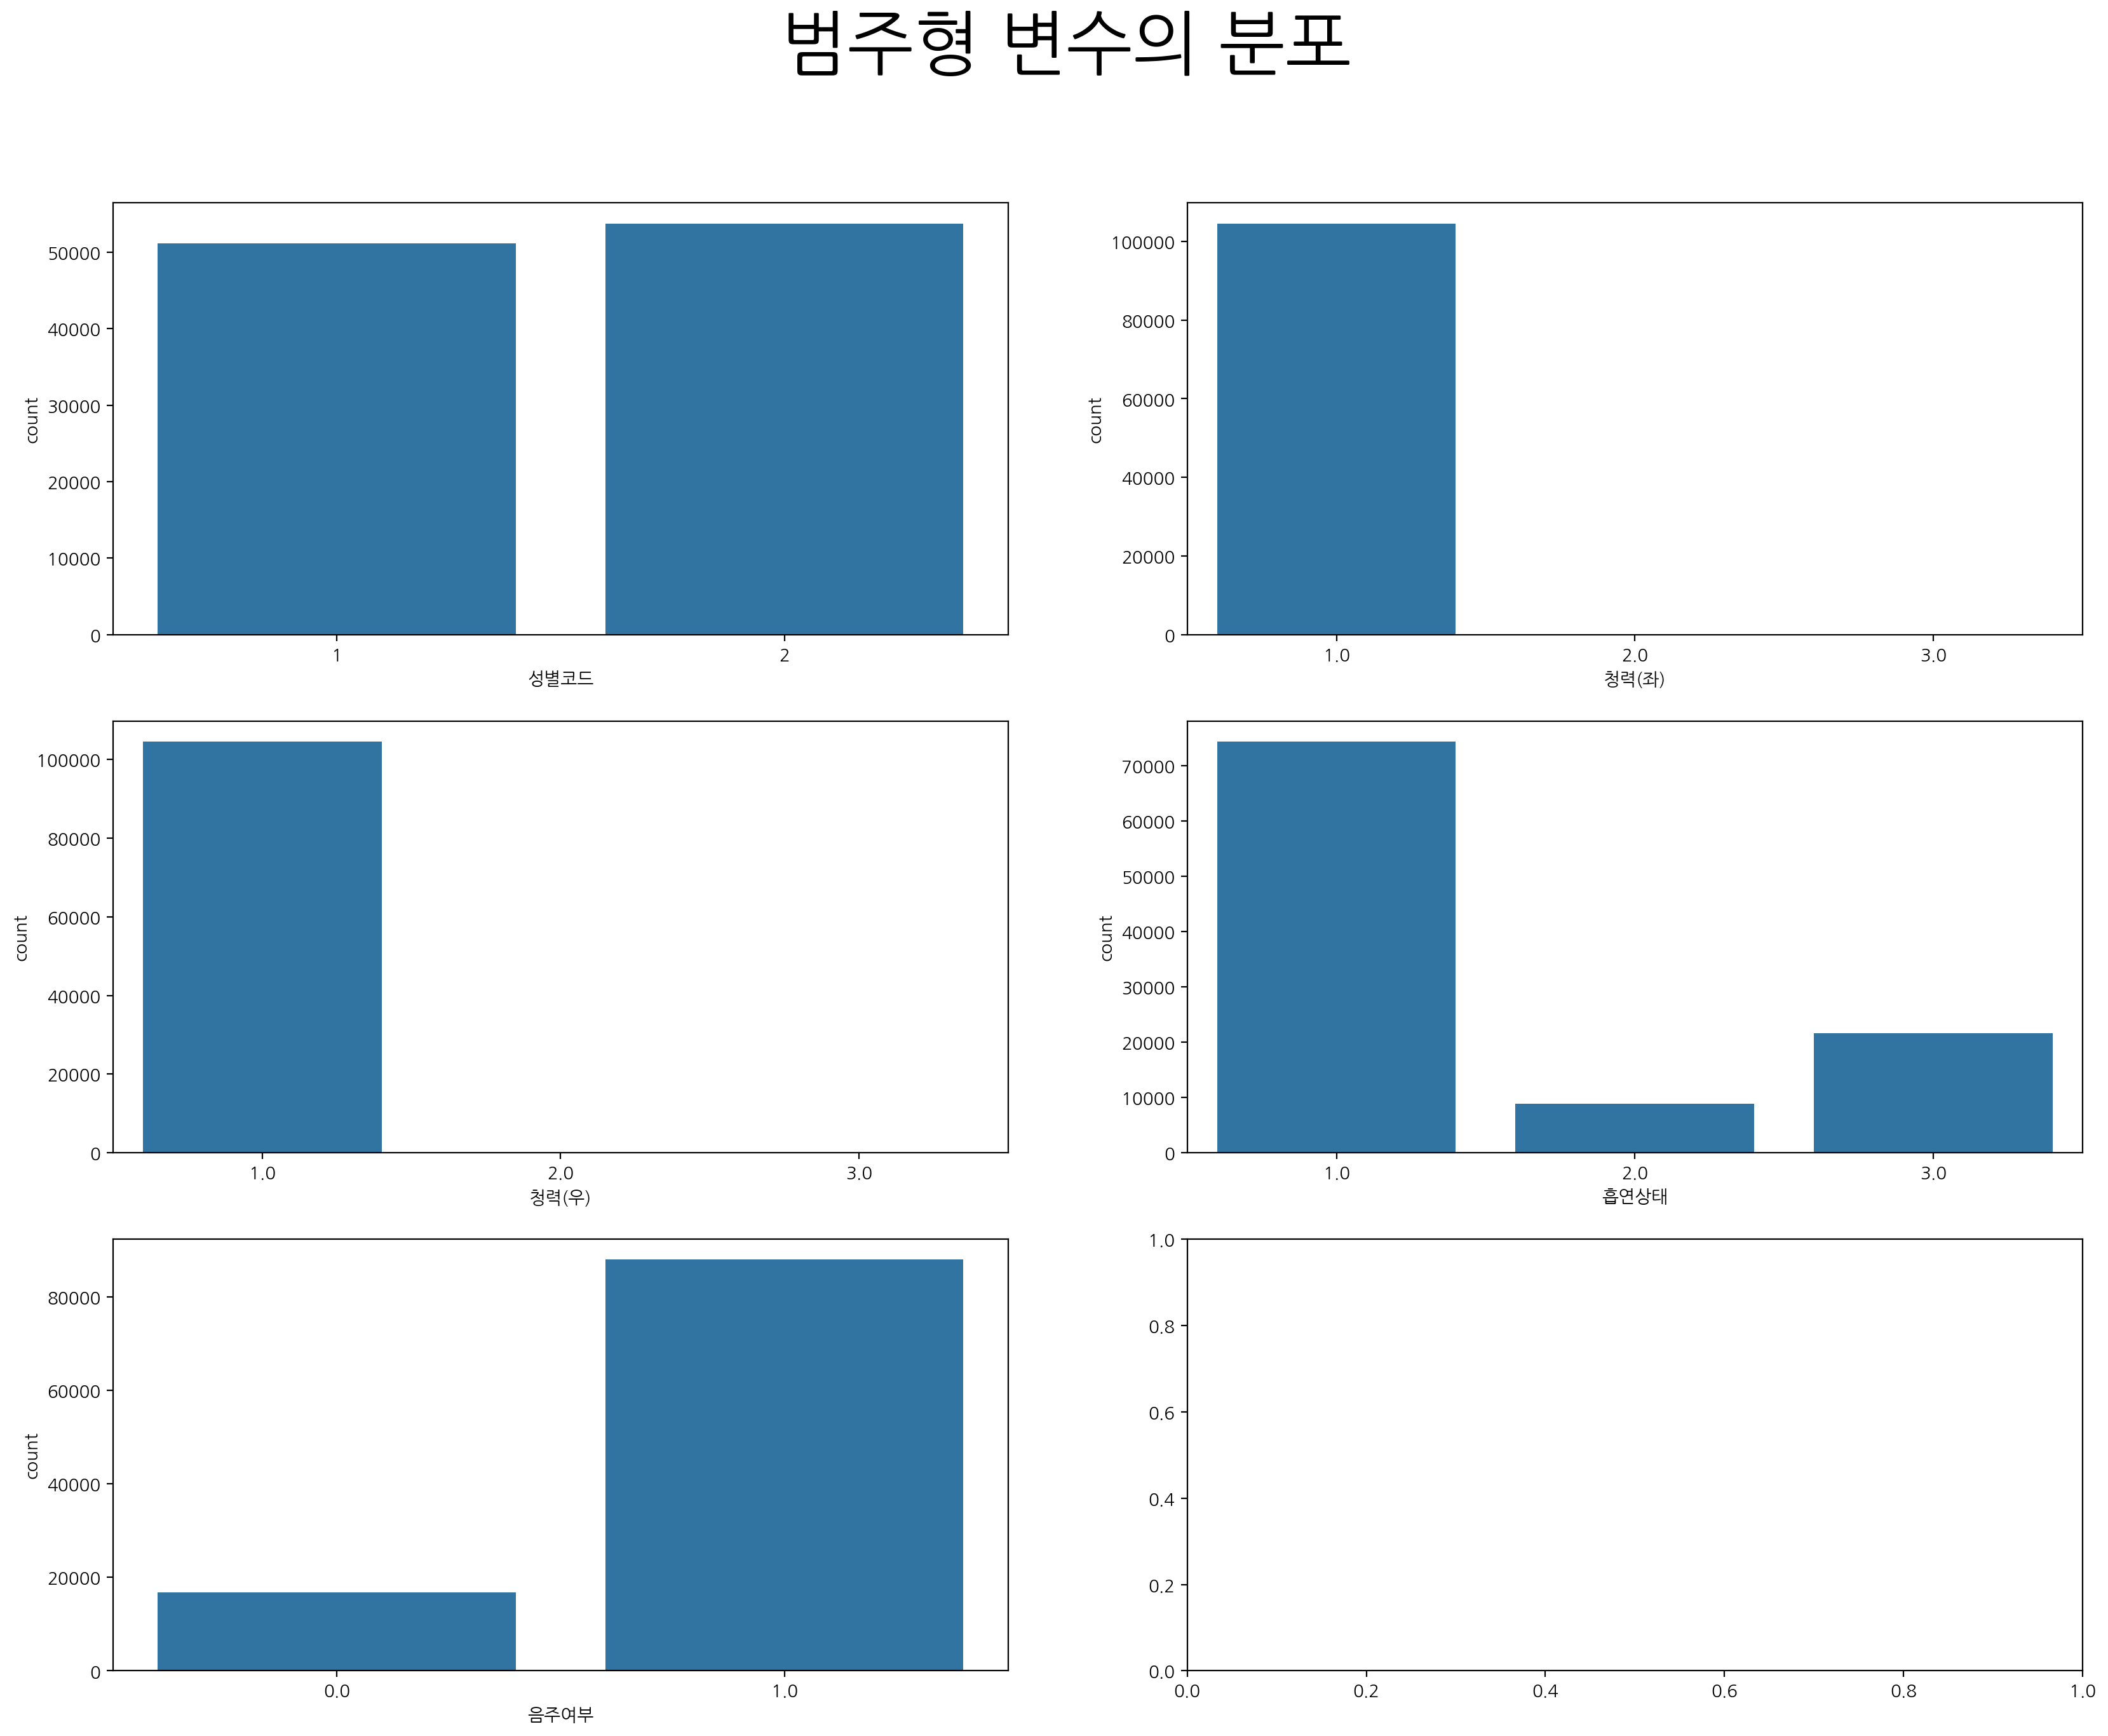

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle('범주형 변수의 분포', fontsize=40)

for ax, feature in zip(axes.flatten(), categorical):
    sns.countplot(data = filtered_ex, x = feature, ax=ax)
plt.show()

In [14]:
stats=filtered_ex[(filtered_ex['청력(좌)']!=3)&(filtered_ex['청력(우)']!=3)]

In [15]:
stats[['청력(좌)','청력(우)']].describe()

,청력(좌),청력(우)
count,104735.000000,104735.000000
mean,1.002053,1.001967
std,0.045262,0.044306
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,2.000000,2.000000


In [16]:
filtered_ex['감마지티피'].describe()

count    104815.000000
mean         24.856652
std          40.998330
min           2.000000
25%          13.000000
50%          17.000000
75%          26.000000
max        9999.000000
Name: 감마지티피, dtype: float64

In [13]:
category_counts = filtered_ex['성별코드'].value_counts()
print("범주별 빈도수:")
print(category_counts)

범주별 빈도수:
성별코드
2    53724
1    51095
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(6, 3))

sns.countplot(data=filtered_ex, x='성별코드', order=filtered_ex['성별코드'].value_counts().index, palette='Greens')
plt.title('성별코드 변수의 빈도수')
plt.xlabel('성별코드')
plt.ylabel('빈도수')

C:\Users\조현서\AppData\Local\Temp\ipykernel_14768\1481394795.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_ex, x='성별코드', order=filtered_ex['성별코드'].value_counts().index, palette='Greens')


Text(0, 0.5, '빈도수')

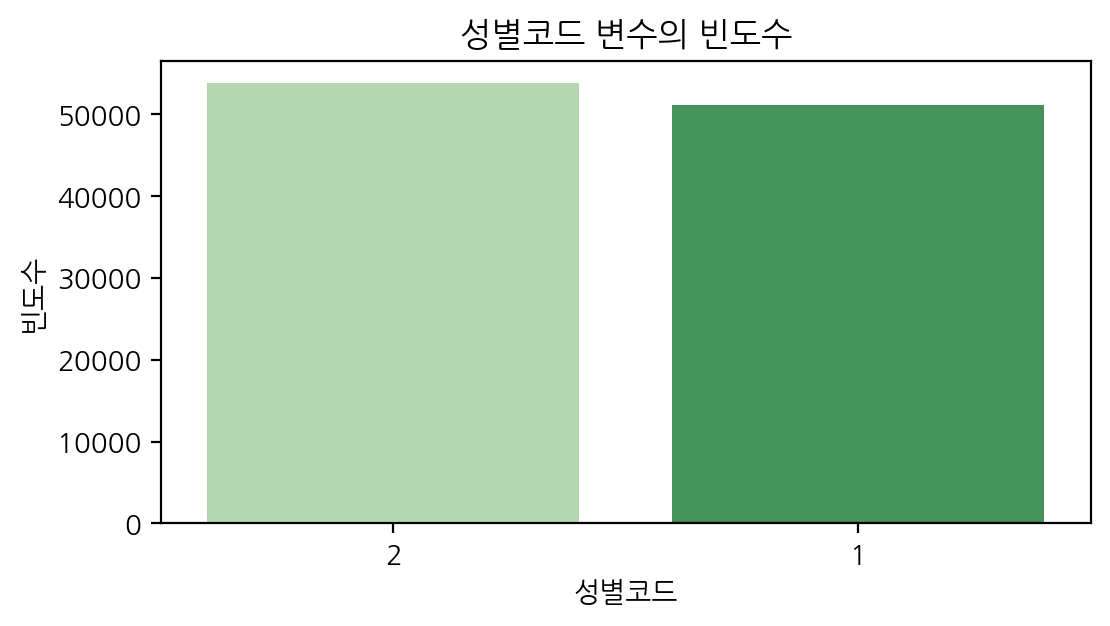

In [43]:
plt.figure(figsize=(6, 3))

sns.countplot(data=filtered_ex, x='성별코드', order=filtered_ex['성별코드'].value_counts().index, palette='Greens')
plt.title('성별코드 변수의 빈도수')
plt.xlabel('성별코드')
plt.ylabel('빈도수')

C:\Users\조현서\AppData\Local\Temp\ipykernel_24528\2653805160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_ex, x='흡연상태', order=filtered_ex['흡연상태'].value_counts().index, palette='pastel')
C:\Users\조현서\AppData\Local\Temp\ipykernel_24528\2653805160.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_ex, x='음주여부', order=filtered_ex['음주여부'].value_counts().index, palette='pastel')


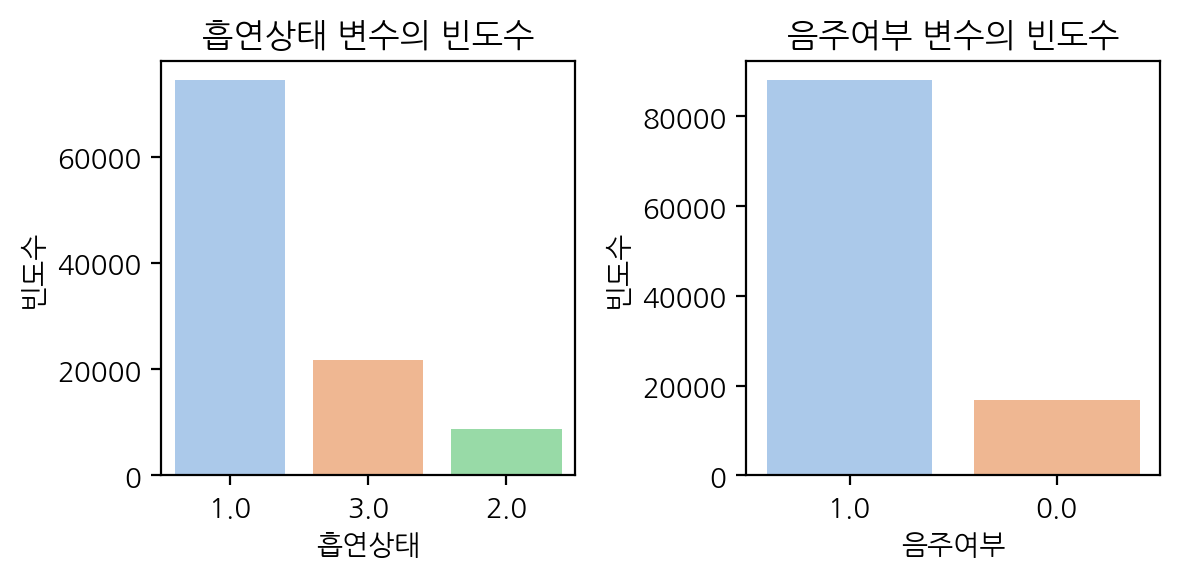

In [17]:
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
sns.countplot(data=filtered_ex, x='흡연상태', order=filtered_ex['흡연상태'].value_counts().index, palette='pastel')
plt.title('흡연상태 변수의 빈도수')
plt.xlabel('흡연상태')
plt.ylabel('빈도수')

plt.subplot(1, 2, 2)
sns.countplot(data=filtered_ex, x='음주여부', order=filtered_ex['음주여부'].value_counts().index, palette='pastel')
plt.title('음주여부 변수의 빈도수')
plt.xlabel('음주여부')
plt.ylabel('빈도수')

plt.tight_layout()
plt.show()

C:\Users\조현서\AppData\Local\Temp\ipykernel_14768\2560268901.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data = filtered_ex, x = feature, ax=ax, palette='pastel')
C:\Users\조현서\AppData\Local\Temp\ipykernel_14768\2560268901.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data = filtered_ex, x = feature, ax=ax, palette='pastel')
C:\Users\조현서\AppData\Local\Temp\ipykernel_14768\2560268901.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data = filtered_ex, x = feature, ax=ax, palette='pastel')
C:\Users\조현서\AppData\Local\Temp\ip

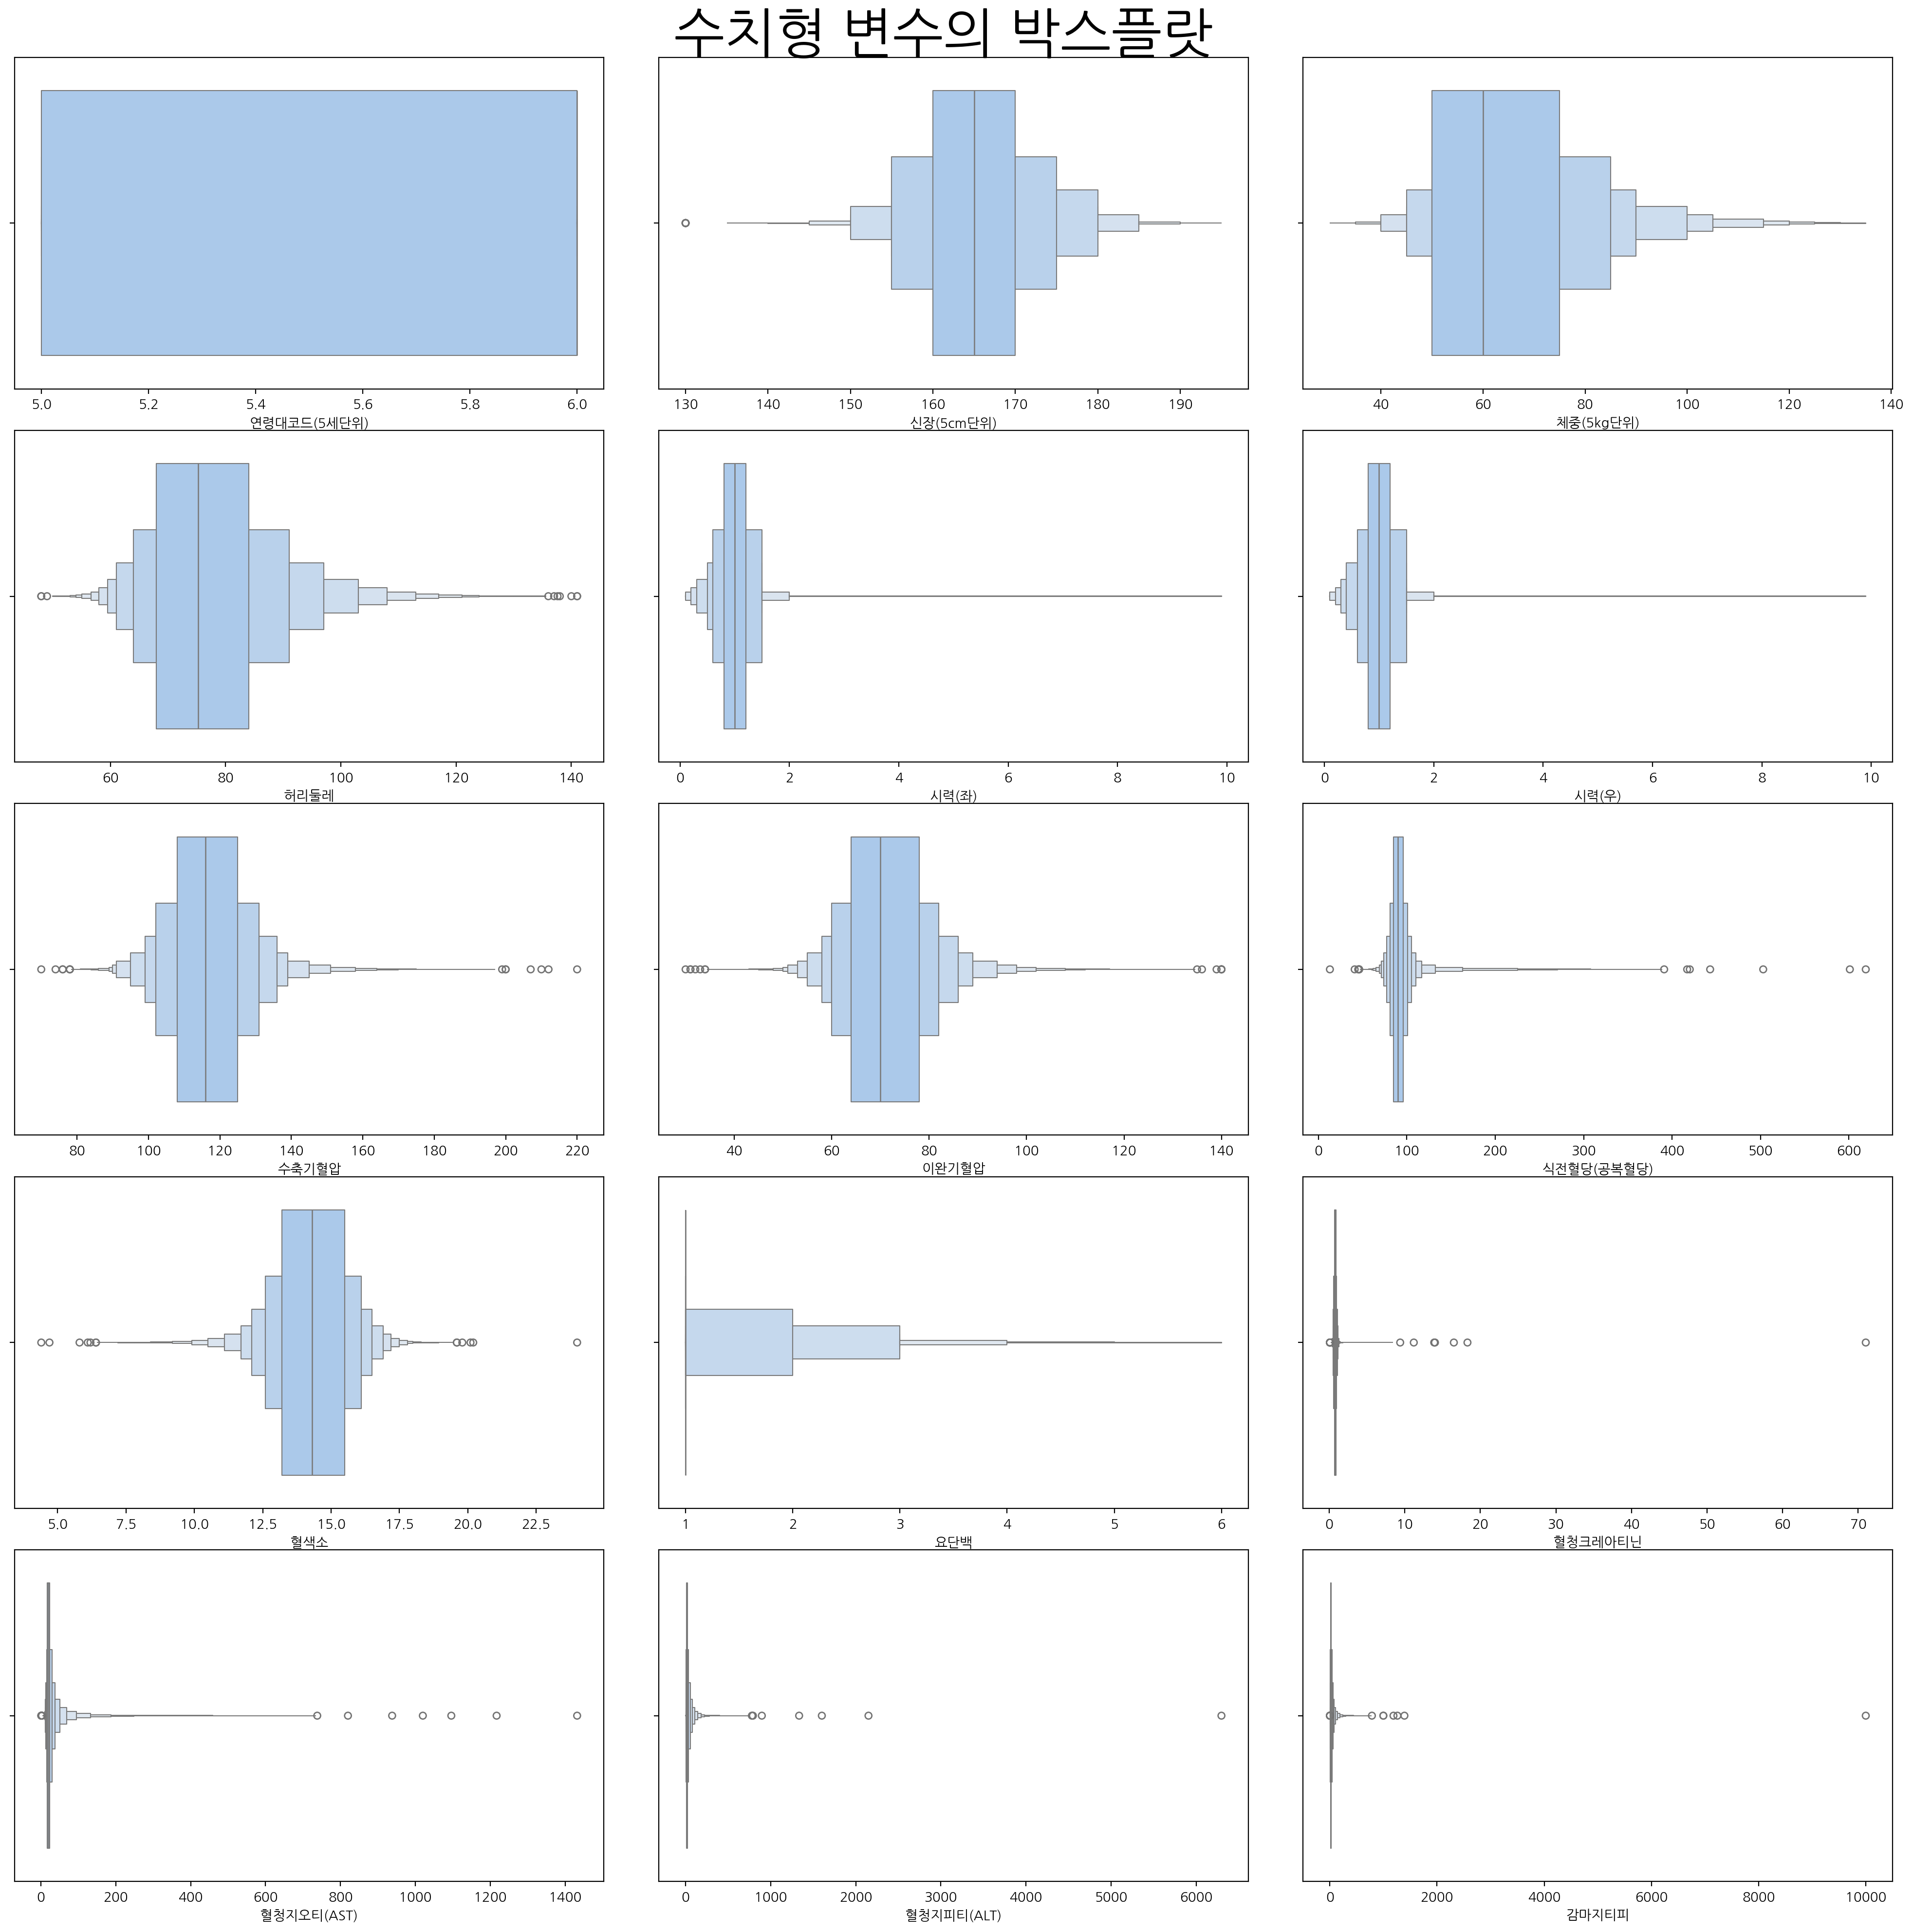

In [42]:
fig, axes = plt.subplots(5, 3, figsize=(20,20))
fig.suptitle('수치형 변수의 박스플랏', fontsize=40)
plt.tight_layout()

for ax,feature in zip(axes.flatten(),quantitative):
    sns.boxenplot(data = filtered_ex, x = feature, ax=ax, palette='pastel')
plt.show()

In [29]:
print(filtered_ex[quantitative].describe())

         연령대코드(5세단위)      신장(5cm단위)      체중(5kg단위)           허리둘레  \
count  104819.000000  104819.000000  104819.000000  104763.000000   
mean        5.676299     165.481878      64.748900      76.896673   
std         0.467890       8.601454      15.911007      11.889429   
min         5.000000     130.000000      30.000000      48.000000   
25%         5.000000     160.000000      50.000000      68.000000   
50%         6.000000     165.000000      60.000000      75.200000   
75%         6.000000     170.000000      75.000000      84.000000   
max         6.000000     195.000000     135.000000     141.000000   

               시력(좌)          시력(우)          수축기혈압          이완기혈압  \
count  104800.000000  104800.000000  104817.000000  104817.000000   
mean        1.028445       1.021142     116.666018      71.409123   
std         0.406520       0.420191      12.538776       9.527324   
min         0.100000       0.100000      70.000000      30.000000   
25%         0.800000       0.8000

In [44]:
result= filtered_ex[filtered_ex['식전혈당(공복혈당)']>=400]
result_1 = result[['식전혈당(공복혈당)']]
print(result_1)

        식전혈당(공복혈당)
139131       619.0
479057       417.0
746313       503.0
787965       420.0
861418       601.0
979494       443.0


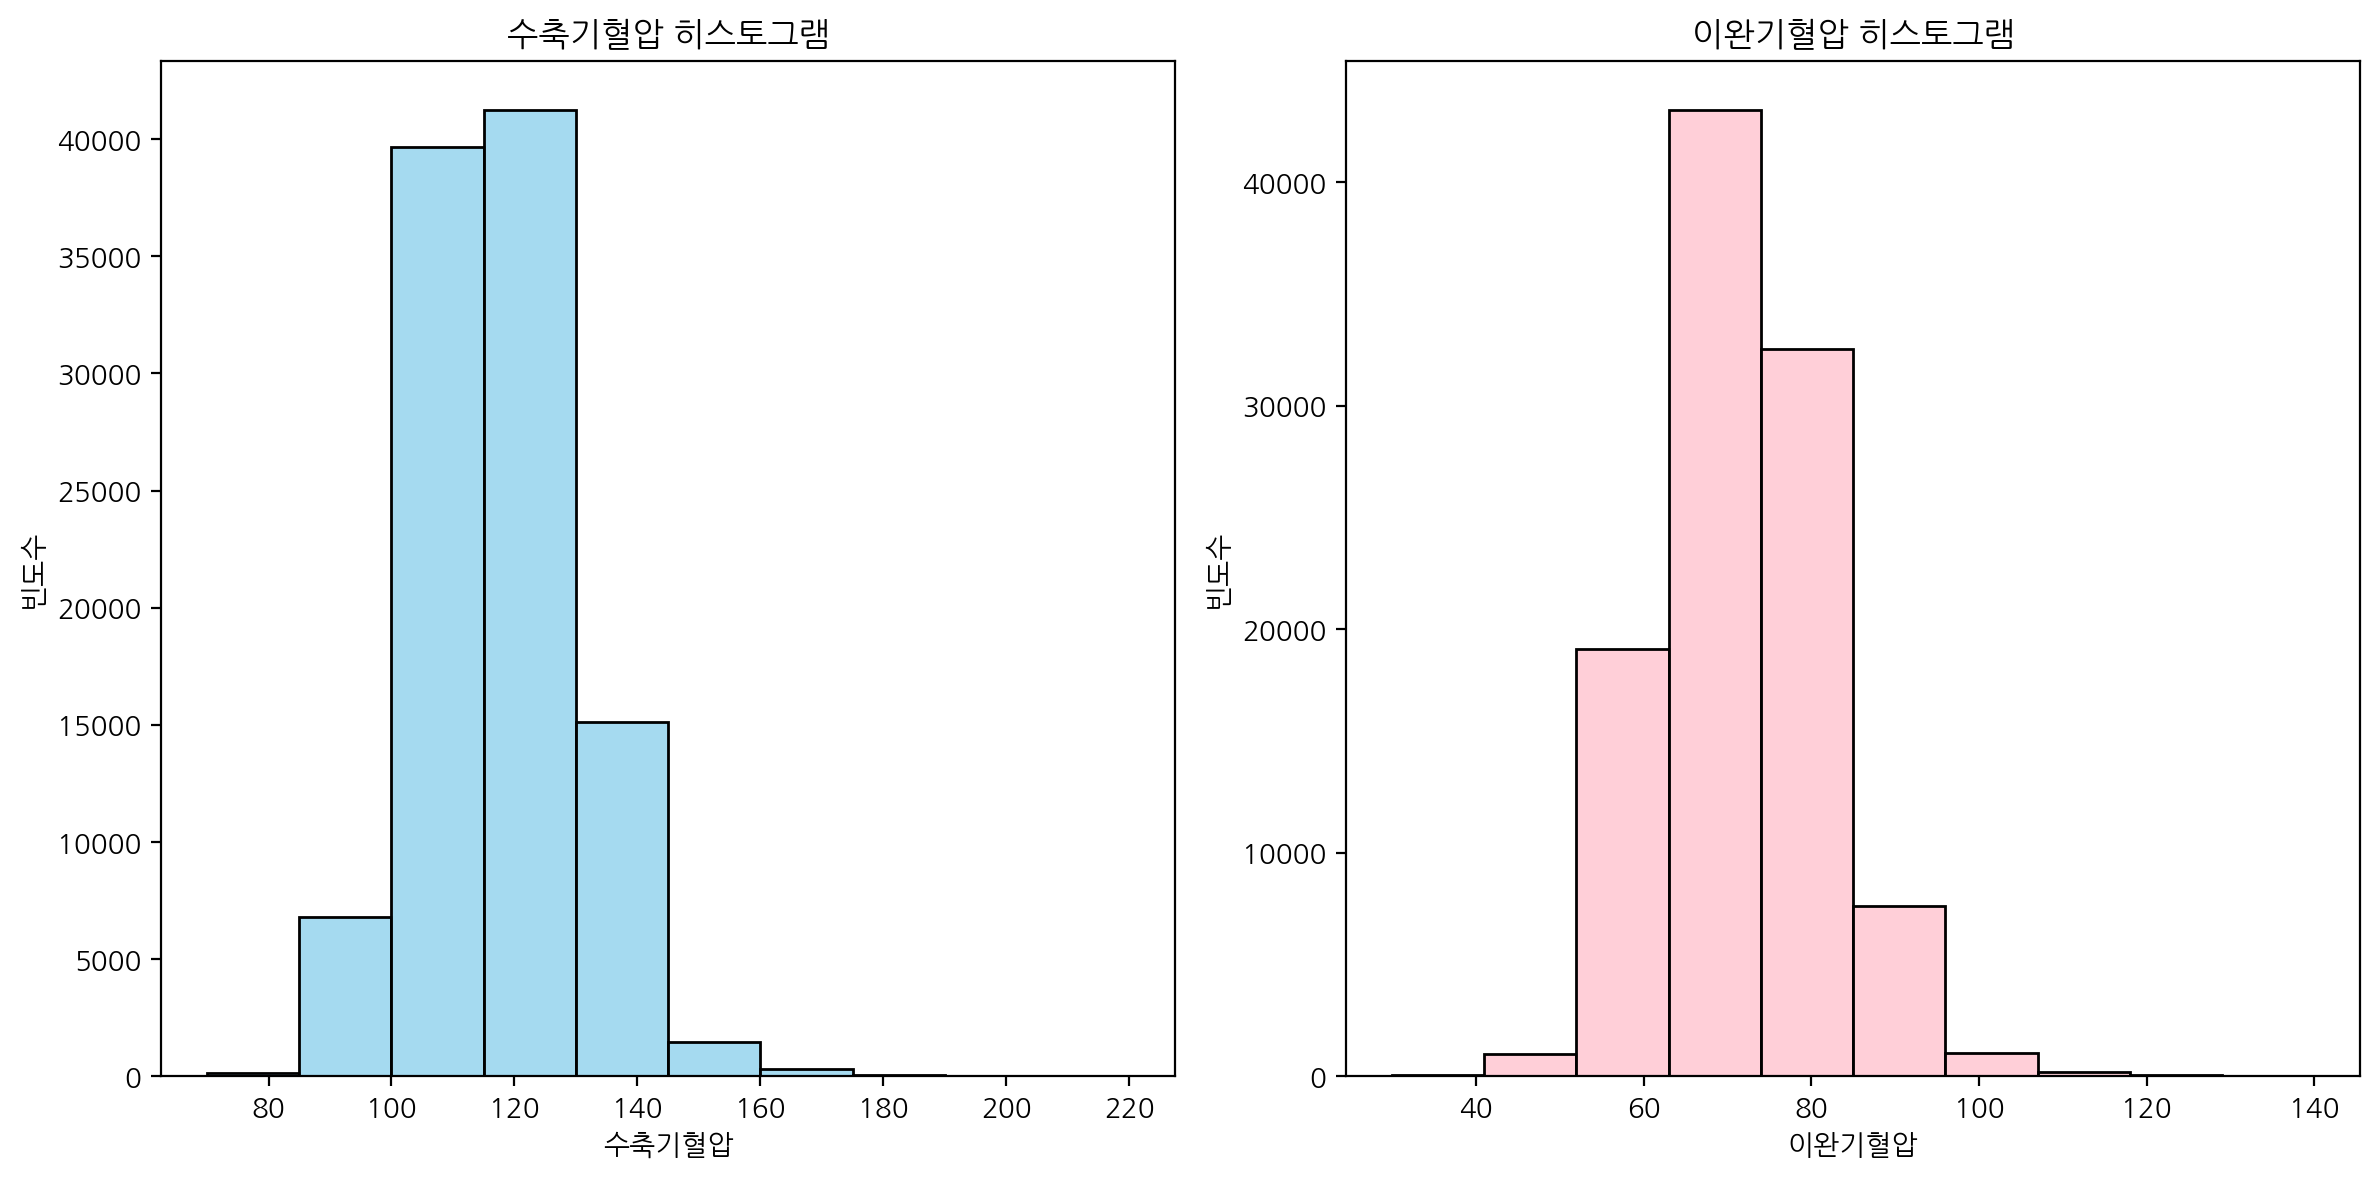

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(filtered_ex['수축기혈압'], bins=10, color='skyblue')
plt.title('수축기혈압 히스토그램')
plt.xlabel('수축기혈압')
plt.ylabel('빈도수')

plt.subplot(1, 2, 2)
sns.histplot(filtered_ex['이완기혈압'], bins=10, color='pink')
plt.title('이완기혈압 히스토그램')
plt.xlabel('이완기혈압')
plt.ylabel('빈도수')

plt.tight_layout()
plt.show()

Text(0, 0.5, '빈도수')

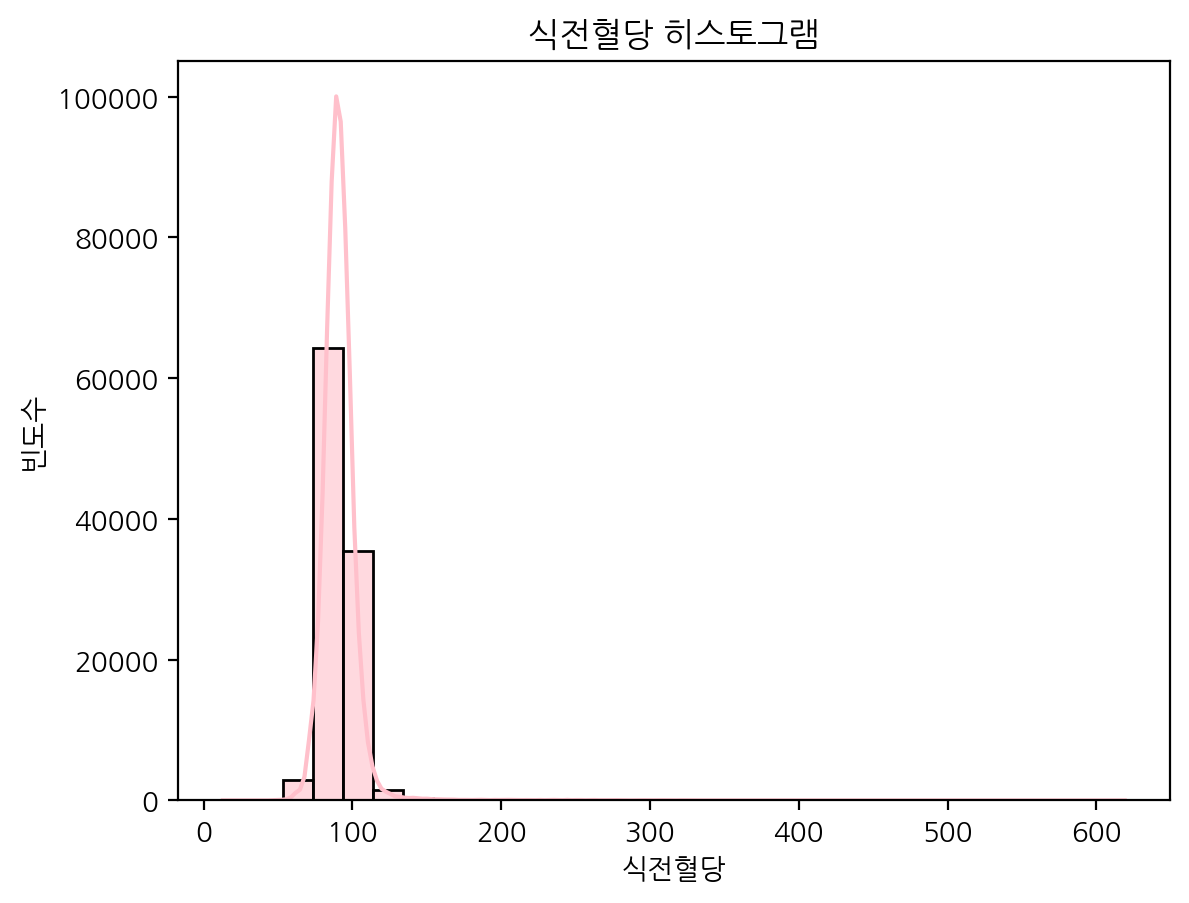

In [42]:
sns.histplot(filtered_ex['식전혈당(공복혈당)'], bins=30, kde=True, color='pink', alpha=0.6)
plt.title('식전혈당 히스토그램')
plt.xlabel('식전혈당')
plt.ylabel('빈도수')

## 전처리

### 수축기혈압, 이완기혈압 결측처리 -> 평균치 대체(성별 구분해서)

In [173]:
print(filtered_ex['수축기혈압'].isnull().sum())
print(filtered_ex['이완기혈압'].isnull().sum())

2
2


In [6]:
male_bloodpressure1_mean = filtered_ex[filtered_ex['성별코드'] == 1]['수축기혈압'].mean()
female_bloodpressure1_mean = filtered_ex[filtered_ex['성별코드'] == 2]['수축기혈압'].mean()

male_bloodpressure2_mean = filtered_ex[filtered_ex['성별코드'] == 1]['이완기혈압'].mean()
female_bloodpressure2_mean = filtered_ex[filtered_ex['성별코드'] == 2]['이완기혈압'].mean()

In [7]:
# 혈압 결측치를 성별에 따라 평균으로 대체
filtered_ex.loc[(filtered_ex['성별코드'] == 1) & (filtered_ex['수축기혈압'].isnull()), '수축기혈압'] = male_bloodpressure1_mean
filtered_ex.loc[(filtered_ex['성별코드'] == 2) & (filtered_ex['수축기혈압'].isnull()), '수축기혈압'] = female_bloodpressure1_mean

filtered_ex.loc[(filtered_ex['성별코드'] == 1) & (filtered_ex['이완기혈압'].isnull()), '이완기혈압'] = male_bloodpressure2_mean
filtered_ex.loc[(filtered_ex['성별코드'] == 2) & (filtered_ex['이완기혈압'].isnull()), '이완기혈압'] = female_bloodpressure2_mean

In [8]:
print(filtered_ex['수축기혈압'].isnull().sum())
print(filtered_ex['이완기혈압'].isnull().sum())

0
0


### 식전혈당(공복혈당) 결측 처리(평균치 대체) -> 남녀 구분

In [177]:

print(filtered_ex['식전혈당(공복혈당)'].isnull().sum())

4


In [9]:
male_bloodsugar_mean = filtered_ex[filtered_ex['성별코드'] == 1]['식전혈당(공복혈당)'].mean()
female_bloodsugar_mean = filtered_ex[filtered_ex['성별코드'] == 2]['식전혈당(공복혈당)'].mean()

In [10]:
# 혈압 결측치를 성별에 따라 평균으로 대체
filtered_ex.loc[(filtered_ex['성별코드'] == 1) & (filtered_ex['수축기혈압'].isnull()), '수축기혈압'] = male_bloodpressure1_mean
filtered_ex.loc[(filtered_ex['성별코드'] == 2) & (filtered_ex['수축기혈압'].isnull()), '수축기혈압'] = female_bloodpressure1_mean

filtered_ex.loc[(filtered_ex['성별코드'] == 1) & (filtered_ex['이완기혈압'].isnull()), '이완기혈압'] = male_bloodpressure2_mean
filtered_ex.loc[(filtered_ex['성별코드'] == 2) & (filtered_ex['이완기혈압'].isnull()), '이완기혈압'] = female_bloodpressure2_mean

In [11]:
print(filtered_ex['수축기혈압'].isnull().sum())
print(filtered_ex['이완기혈압'].isnull().sum())

0
0


### 식전혈당(공복혈당) 결측 처리(평균치 대체) -> 남녀 구분

In [181]:

print(filtered_ex['식전혈당(공복혈당)'].isnull().sum())

4


In [12]:
male_bloodsugar_mean = filtered_ex[filtered_ex['성별코드'] == 1]['식전혈당(공복혈당)'].mean()
female_bloodsugar_mean = filtered_ex[filtered_ex['성별코드'] == 2]['식전혈당(공복혈당)'].mean()

filtered_ex.loc[(filtered_ex['성별코드'] == 1) & (filtered_ex['식전혈당(공복혈당)'].isnull()), '식전혈당(공복혈당)'] = male_bloodsugar_mean
filtered_ex.loc[(filtered_ex['성별코드'] == 2) & (filtered_ex['식전혈당(공복혈당)'].isnull()), '식전혈당(공복혈당)'] = female_bloodsugar_mean

In [183]:

print(filtered_ex['식전혈당(공복혈당)'].isnull().sum())

0



### 혈색소 결측 처리(평균치 대체) -> 남녀 구분
- 혈액이나 혈구 속에 존재하는 색소단백으로 글로빈(globin)과 엠(heme)으로 구성되며 혈중의 산소운반체로서의 역할 수

In [184]:

print(filtered_ex['혈색소'].isnull().sum())

4


In [13]:

male_hemoglobin_mean = filtered_ex[filtered_ex['성별코드'] == 1]['혈색소'].mean()
female_hemoglobin_mean = filtered_ex[filtered_ex['성별코드'] == 2]['혈색소'].mean()

filtered_ex.loc[(filtered_ex['성별코드'] == 1) & (filtered_ex['혈색소'].isnull()), '혈색소'] = male_hemoglobin_mean
filtered_ex.loc[(filtered_ex['성별코드'] == 2) & (filtered_ex['혈색소'].isnull()), '혈색소'] = female_hemoglobin_mean


print(filtered_ex['혈색소'].isnull().sum())

0


### 혈청크레아티닌, 혈청지오티, 혈청지피티, 감마지티피 결측 각 4개씩 -> 평균대체

In [186]:
print(filtered_ex['혈청크레아티닌'].isnull().sum())
print(filtered_ex['혈청지오티(AST)'].isnull().sum())
print(filtered_ex['혈청지피티(ALT)'].isnull().sum())
print(filtered_ex['감마지티피'].isnull().sum())

4
4
4
4


In [14]:

male_Creatinine_mean = filtered_ex[filtered_ex['성별코드'] == 1]['혈청크레아티닌'].mean()
female_Creatinine_mean = filtered_ex[filtered_ex['성별코드'] == 2]['혈청크레아티닌'].mean()

male_AST_mean = filtered_ex[filtered_ex['성별코드'] == 1]['혈청지오티(AST)'].mean()
female_AST_mean = filtered_ex[filtered_ex['성별코드'] == 2]['혈청지오티(AST)'].mean()

male_ALT_mean = filtered_ex[filtered_ex['성별코드'] == 1]['혈청지피티(ALT)'].mean()
female_ALT_mean = filtered_ex[filtered_ex['성별코드'] == 2]['혈청지피티(ALT)'].mean()

male_GTP_mean = filtered_ex[filtered_ex['성별코드'] == 1]['감마지티피'].mean()
female_GTP_mean = filtered_ex[filtered_ex['성별코드'] == 2]['감마지티피'].mean()

#대체
filtered_ex.loc[(filtered_ex['성별코드'] == 1) & (filtered_ex['혈청크레아티닌'].isnull()), '혈청크레아티닌'] = male_Creatinine_mean
filtered_ex.loc[(filtered_ex['성별코드'] == 2) & (filtered_ex['혈청크레아티닌'].isnull()), '혈청크레아티닌'] = female_Creatinine_mean

filtered_ex.loc[(filtered_ex['성별코드'] == 1) & (filtered_ex['혈청지오티(AST)'].isnull()), '혈청지오티(AST)'] = male_AST_mean
filtered_ex.loc[(filtered_ex['성별코드'] == 2) & (filtered_ex['혈청지오티(AST)'].isnull()), '혈청지오티(AST)'] = female_AST_mean

filtered_ex.loc[(filtered_ex['성별코드'] == 1) & (filtered_ex['혈청지피티(ALT)'].isnull()), '혈청지피티(ALT)'] = male_ALT_mean
filtered_ex.loc[(filtered_ex['성별코드'] == 2) & (filtered_ex['혈청지피티(ALT)'].isnull()), '혈청지피티(ALT)'] = female_ALT_mean

filtered_ex.loc[(filtered_ex['성별코드'] == 1) & (filtered_ex['감마지티피'].isnull()), '감마지티피'] = male_GTP_mean
filtered_ex.loc[(filtered_ex['성별코드'] == 2) & (filtered_ex['감마지티피'].isnull()), '감마지티피'] = female_GTP_mean


print(filtered_ex['혈청크레아티닌'].isnull().sum())
print(filtered_ex['혈청지오티(AST)'].isnull().sum())
print(filtered_ex['혈청지피티(ALT)'].isnull().sum())
print(filtered_ex['감마지티피'].isnull().sum())

0
0
0
0


### 시력변수 결측치 처리 & 새 시력변수 생성

시력 결측치 채우고 새 변수 '시력'만들기
- 결측치 처리 : 시력(좌),(우) 각각 평균 내서 결측치 채움
- '시력'변수 생성 : 양안 차이가 0.5보다 작으면 둘의 평균으로, 같거나 크면 더 작은 수치의 값 따라가는걸로

In [15]:
# 시력(좌) 평균 내서 결측치 채우기
sight_right_mean = round(filtered_ex['시력(좌)'].mean(),1)
filtered_ex['시력(좌)'].fillna(sight_right_mean,inplace=True)

# 시력(우) 평균 내서 결측치 채우기
sight_left_mean = round(filtered_ex['시력(우)'].mean(),1)
filtered_ex['시력(우)'].fillna(sight_left_mean,inplace=True)

# '시력' 변수 생성
def calculate_시력(row):
    차이 = abs(row['시력(좌)'] - row['시력(우)'])
    if 차이 < 0.5:
        return (row['시력(좌)'] + row['시력(우)']) / 2
    else:
        return min(row['시력(좌)'], row['시력(우)'])
    
filtered_ex['시력'] = filtered_ex.apply(calculate_시력,axis=1)

C:\Users\조현서\AppData\Local\Temp\ipykernel_20676\1861029263.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_ex['시력(좌)'].fillna(sight_right_mean,inplace=True)
C:\Users\조현서\AppData\Local\Temp\ipykernel_20676\1861029263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ex['시력(좌)'].fillna(sight_right_mean,inplace=True)
C:\Us

In [189]:
print(filtered_ex['시력(우)'].isnull().sum())
print(filtered_ex['시력(좌)'].isnull().sum())

0
0


### 청력변수 결측치 처리 & 새 청력변수 생성

이제 청력 변수를 처리할 건데, 청력이 3인 값들은 메뉴얼에 따르면 이상치이므로 먼저 결측치로 간주

In [16]:
# '청력(좌)'와 '청력(우)'의 3.0 값을 NaN으로 변경
filtered_ex['청력(좌)'] = filtered_ex['청력(좌)'].replace(3.0, np.nan)
filtered_ex['청력(우)'] = filtered_ex['청력(우)'].replace(3.0, np.nan)

C:\Users\조현서\AppData\Local\Temp\ipykernel_20676\3235203265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ex['청력(좌)'] = filtered_ex['청력(좌)'].replace(3.0, np.nan)
C:\Users\조현서\AppData\Local\Temp\ipykernel_20676\3235203265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ex['청력(우)'] = filtered_ex['청력(우)'].replace(3.0, np.nan)


In [17]:
# 청력(좌), 청력(우) 값이 3인 데이터를 결측치로 처리
filtered_ex.loc[filtered_ex['청력(좌)'] == 3, '청력(좌)'] = pd.NA
filtered_ex.loc[filtered_ex['청력(우)'] == 3, '청력(우)'] = pd.NA

# 청력(좌), 청력(우) 각각의 최빈값으로 결측치 대체
hearing_mode_left = filtered_ex['청력(좌)'].mode()
hearing_mode_right = filtered_ex['청력(우)'].mode()

# 청력(좌)의 결측치 대체
if not hearing_mode_left.empty:
    filtered_ex['청력(좌)'].fillna(hearing_mode_left[0], inplace=True)
# 청력(우)의 결측치 대체
if not hearing_mode_right.empty:
    filtered_ex['청력(우)'].fillna(hearing_mode_right[0], inplace=True)

# 새 변수 '청력' 생성
filtered_ex['청력'] = filtered_ex[['청력(좌)', '청력(우)']].min(axis=1)

C:\Users\조현서\AppData\Local\Temp\ipykernel_20676\1123440578.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_ex['청력(좌)'].fillna(hearing_mode_left[0], inplace=True)
C:\Users\조현서\AppData\Local\Temp\ipykernel_20676\1123440578.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ex['청력(좌)'].fillna(hearing_mode_left[0], inplace

In [192]:
print(filtered_ex['청력(우)'].isnull().sum())
print(filtered_ex['청력(좌)'].isnull().sum())

0
0


### 허리둘레 결측 처리 cm단위 -> 성별 구분

In [193]:
print(filtered_ex['허리둘레'].isnull().sum())

56


In [18]:
df_male = filtered_ex[(filtered_ex.loc[:,'성별코드']==1)]
df_female = filtered_ex[(filtered_ex.loc[:,'성별코드']!=1)]

In [19]:
print(df_female['허리둘레'].isna().sum()) #여성 허리둘레 결측

56


In [20]:
print(df_male['허리둘레'].isna().sum()) #남성 허리둘레 결측

0


결측치는 모두 여성. 남성은 결측치가 존재하지 않음

In [21]:
filtered_ex = pd.concat([df_male,df_female])
filtered_ex = filtered_ex.sort_index(ascending=True)
filtered_ex = filtered_ex.reset_index(drop=True)

In [22]:
df_h = filtered_ex[['허리둘레','신장(5cm단위)', '체중(5kg단위)']]
corr_matrix = df_h.corr()
print(corr_matrix)

               허리둘레  신장(5cm단위)  체중(5kg단위)
허리둘레       1.000000   0.489916   0.906740
신장(5cm단위)  0.489916   1.000000   0.629765
체중(5kg단위)  0.906740   0.629765   1.000000


In [23]:
# 신장과 체중을 기준으로 허리둘레의 평균을 그룹별로 계산
grouped_mean = round(filtered_ex.groupby(['신장(5cm단위)', '체중(5kg단위)'])['허리둘레'].mean(),2)
grouped_mean

신장(5cm단위)  체중(5kg단위)
130        30            72.00
           35            61.23
           40            63.00
135        30            56.00
           35            60.00
                         ...  
195        105           97.20
           110           98.45
           120          106.00
           125          116.40
           135          126.00
Name: 허리둘레, Length: 218, dtype: float64

In [24]:
grouped_mean = pd.DataFrame(grouped_mean)
grouped_mean = grouped_mean.reset_index()

In [201]:

grouped_mean.columns

Index(['신장(5cm단위)', '체중(5kg단위)', '허리둘레'], dtype='object')

In [25]:
for i in range(len(filtered_ex)):
    if pd.isna(filtered_ex.iloc[i]['허리둘레']):  # 허리둘레가 결측치인 경우
        # 현재 행의 신장과 체중에 맞는 그룹 찾기
        match = grouped_mean[
            (grouped_mean['신장(5cm단위)'] == filtered_ex.iloc[i]['신장(5cm단위)']) &
            (grouped_mean['체중(5kg단위)'] == filtered_ex.iloc[i]['체중(5kg단위)'])
        ]
        
        if not match.empty:  # match가 비어있지 않은 경우
            filtered_ex.at[i, '허리둘레'] = match['허리둘레'].values[0]  # 첫 번째 값을 대체

### 흡연상태 결측7개-> 최빈값으로 대체

In [26]:
filtered_ex['흡연상태'].fillna(filtered_ex['흡연상태'].mode()[0], inplace=True)

print(filtered_ex['흡연상태'].isnull().sum())

0


C:\Users\조현서\AppData\Local\Temp\ipykernel_20676\3927283167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_ex['흡연상태'].fillna(filtered_ex['흡연상태'].mode()[0], inplace=True)


### 음주여부 결측1개 -> 최빈값으로 대체

In [27]:
filtered_ex['음주여부'].fillna(filtered_ex['음주여부'].mode()[0], inplace=True)

print(filtered_ex['음주여부'].isnull().sum())

0


C:\Users\조현서\AppData\Local\Temp\ipykernel_20676\4011240364.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_ex['음주여부'].fillna(filtered_ex['음주여부'].mode()[0], inplace=True)


In [205]:
filtered_ex.isna().sum()

성별코드             0
연령대코드(5세단위)      0
신장(5cm단위)        0
체중(5kg단위)        0
허리둘레             0
시력(좌)            0
시력(우)            0
청력(좌)            0
청력(우)            0
수축기혈압            0
이완기혈압            0
식전혈당(공복혈당)       0
혈색소              0
요단백            525
혈청크레아티닌          0
혈청지오티(AST)       0
혈청지피티(ALT)       0
감마지티피            0
흡연상태             0
음주여부             0
시력               0
청력               0
dtype: int64

### 요단백 결측치 처리

In [28]:
pr = filtered_ex['요단백'].value_counts().tolist()
pr

[94384, 6341, 2839, 534, 160, 36]

In [29]:
filtered_ex[filtered_ex['식전혈당(공복혈당)']>126]['요단백'].value_counts()

요단백
1.0    754
2.0     81
3.0     76
4.0     42
5.0     15
6.0      5
Name: count, dtype: int64

In [30]:
rd = filtered_ex[(filtered_ex['식전혈당(공복혈당)']>126) & (filtered_ex['수축기혈압']>120) ]['요단백'].unique().tolist()
prob = []
len(pr)
for i in range(0,len(pr)):
    prob.append(round(pr[i]/sum(pr),3))
prob

[0.905, 0.061, 0.027, 0.005, 0.002, 0.0]

In [31]:
if filtered_ex['요단백'].isna().any():
    df = filtered_ex[filtered_ex['요단백'].isna()]
np.random.seed(100)  # 시드 설정

for i in range(len(df)):
        # 조건을 올바르게 평가
    if (df['식전혈당(공복혈당)'].iloc[i] > 126) & (df['이완기혈압'].iloc[i] > 120):
            filtered_ex.loc[df.index[i], '요단백'] = np.random.choice(rd, size=1, p=prob)[0]
    else:
    # mode()를 사용하여 요단백의 최빈값으로 대체
        filtered_ex.loc[df.index[i], '요단백'] = filtered_ex['요단백'].mode()[0]  # mode는 시리즈의 최빈값을 반환

print(filtered_ex['요단백'].isna().sum())

0


### 새로운 변수 'BMI' 생성
- BMI는 전체적인 비만도 지표
- 허리둘레는 내장지방 특화

In [32]:
# BMI 계산 : 몸무게(kg) / (키(m) ** 2)
# BMI 변수 생성
filtered_ex['BMI'] = filtered_ex['체중(5kg단위)'] / ((filtered_ex['신장(5cm단위)']/100) ** 2)
# 키를 m단위로 변환

print(filtered_ex[['체중(5kg단위)','신장(5cm단위)','BMI']].head())

   체중(5kg단위)  신장(5cm단위)        BMI
0         50        170  17.301038
1         75        170  25.951557
2         55        155  22.892820
3         70        165  25.711662
4         75        175  24.489796


### WHtR(Waist-to-Height Ratio) 변수 생성

In [33]:

filtered_ex['WHtR'] = filtered_ex['허리둘레'] / filtered_ex['신장(5cm단위)']
print(filtered_ex['WHtR'].describe())
print(filtered_ex)

count    104819.000000
mean          0.464107
std           0.063500
min           0.300000
25%           0.418750
50%           0.454545
75%           0.500000
max           0.893333
Name: WHtR, dtype: float64
        성별코드  연령대코드(5세단위)  신장(5cm단위)  체중(5kg단위)  허리둘레  시력(좌)  시력(우)  청력(좌)  \
0          2            5        170         50  69.2    1.0    1.2    1.0   
1          1            6        170         75  91.0    0.9    0.8    1.0   
2          2            6        155         55  74.4    1.2    1.2    1.0   
3          2            5        165         70  79.0    1.0    1.0    1.0   
4          1            5        175         75  76.0    1.2    1.5    1.0   
...      ...          ...        ...        ...   ...    ...    ...    ...   
104814     2            5        165         70  74.0    1.0    1.2    1.0   
104815     1            6        175         75  85.0    1.2    1.2    1.0   
104816     2            6        160         50  62.0    1.2    1.0    1.0   
104817   

In [34]:
# BMI 카테고리화
def categorize_bmi(bmi):
    if bmi < 18.5:
        return '저체중'
    elif 18.5 <= bmi < 25:
        return '정상'
    elif 25 <= bmi < 30:
        return '과체중'
    else:
        return '비만'
    
# WHtR 카테고리화
def categorize_whtr(whtr):
    if whtr < 0.4:
        return '저체중'
    elif 0.4 <= whtr < 0.5:
        return '정상체형'
    else:
        return '위험체형'

In [213]:
#filtered_ex['BMI_category'] = filtered_ex['BMI'].apply(categorize_bmi)
#filtered_ex['WHtR_category'] = filtered_ex['WHtR'].apply(categorize_whtr)

#filtered_ex[['BMI_category', 'WHtR_category']]

In [214]:
# BMI_category와 WHtR_category의 유니크한 조합 확인
#unique_combinations = filtered_ex[['BMI_category', 'WHtR_category']].drop_duplicates()
#unique_combinations

In [215]:
# 각 조합의 개수를 세기
#combination_counts = filtered_ex.groupby(['BMI_category', 'WHtR_category']).size().reset_index(name='count')
#combination_counts

In [216]:
# [과체중, 저체중]과 [비만, 저체중] 조합을 제거
#filtered_ex = filtered_ex[~((filtered_ex['BMI_category'].#isin(['과체중', '비만'])) & (filtered_ex['WHtR_category'] == '저체중'))]
#filtered_ex
# 104754개(=104763-9)

### BMI_WC 위험도 변수 생성
- 0 : 낮음
- 1 : 보통
- 2 : 약간 높음
- 3 : 높음
- 4 : 매우 높음
- 5 : 가장 높음

In [35]:
# 위험도 분류 함수
def categorize_risk(row):
    gender =row['성별코드']
    bmi = row['BMI']
    waist = row['허리둘레']
    
    # 허리둘레 기준 설정
    low_risk_waist = 90 if gender == 1 else 85
    
    # BMI와 허리둘레 기준에 따른 위험도 분류
    if bmi < 18.5:
        BMI_WC_risk = 0 if waist < low_risk_waist else 1
    elif 18.5 <= bmi < 23:
        BMI_WC_risk = 1 if waist < low_risk_waist else 2
    elif 23 <= bmi < 25:
        BMI_WC_risk = 2 if waist < low_risk_waist else 3
    elif 25 <= bmi < 30:
        BMI_WC_risk = 3 if waist < low_risk_waist else 4
    elif 30 <= bmi < 35:
        BMI_WC_risk = 4 if waist < low_risk_waist else 5
    else:
        BMI_WC_risk = 5
    
    return pd.Series(BMI_WC_risk)

# 데이터프레임에 새로운 열 추가
filtered_ex['BMI_WC_risk'] = filtered_ex.apply(categorize_risk, axis=1)

### WHtR로 생성한 위험도 분류 함수

In [36]:
def categorize_risk2(row):
    whtr = row['WHtR']  # 행에서 WHtR 값 추출

    if whtr < 0.43:
        WHtR_risk = 0  # 저체중
    elif 0.43 <= whtr < 0.53:
        WHtR_risk = 1  # 정상
    elif 0.53 <= whtr < 0.58:
        WHtR_risk = 2  # 과체중
    else:
        WHtR_risk = 3  # 비만
    
    return WHtR_risk

# 데이터프레임에 새로운 열 추가
filtered_ex['WHtR_risk'] = filtered_ex.apply(categorize_risk2, axis=1)

In [37]:
# 필요없는 열 제거
missing_cols_1 = ['BMI','WHtR','연령대코드(5세단위)','신장(5cm단위)','체중(5kg단위)','허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)'] 
#'BMI_category','WHtR_category'일단제외
filtered_ex = filtered_ex.drop(missing_cols_1, axis = "columns")

In [222]:
#######################################일단 추가할지말지 모름
# 건강한 여성/남성 행 생성
healthy_female = {
    '성별코드': 2, 
    '수축기혈압': 105,
    '이완기혈압': 70.0,
    '식전혈당(공복혈당)': 90.0,
    '혈색소': 13.75,
    '요단백': 1.0,
    '혈청크레아티닌': 1.25,
    '혈청지오티(AST)': 20.0,
    '혈청지피티(ALT)': 17.5,
    '감마지티피': 21.5,
    '흡연상태': 1,  
    '음주여부': 0,  
    '시력': 0.6,
    '청력': 1.0,
    'BMI_WC_risk': 0,
    'WHtR_risk': 1
}

healthy_male = {
    '성별코드': 1,  
    '수축기혈압': 105,
    '이완기혈압': 70.0,
    '식전혈당(공복혈당)': 90.0,
    '혈색소': 14.75,
    '요단백': 1.0,
    '혈청크레아티닌': 1.25,
    '혈청지오티(AST)': 20.0,
    '혈청지피티(ALT)': 17.5,
    '감마지티피': 37,
    '흡연상태': 1,  
    '음주여부': 0,  
    '시력': 0.6,
    '청력': 1.0,
    'BMI_WC_risk': 0,
    'WHtR_risk': 1
}

healthy_data= pd.DataFrame([healthy_female, healthy_male])

# 데이터프레임에 건강한 행 추가
filtered_ex = pd.concat([filtered_ex, healthy_data], ignore_index=True)

# 마지막 두 행 결과 확인
print(filtered_ex.tail())

        성별코드  수축기혈압  이완기혈압  식전혈당(공복혈당)    혈색소  요단백  혈청크레아티닌  혈청지오티(AST)  \
104816     2  100.0   61.0        93.0  13.60  1.0     0.80        20.0   
104817     2   98.0   67.0        96.0  13.20  3.0     1.00        21.0   
104818     1  125.0   80.0        92.0  16.90  1.0     1.10        30.0   
104819     2  105.0   70.0        90.0  13.75  1.0     1.25        20.0   
104820     1  105.0   70.0        90.0  14.75  1.0     1.25        20.0   

        혈청지피티(ALT)  감마지티피  흡연상태  음주여부   시력   청력  BMI_WC_risk  WHtR_risk  
104816        14.0   12.0   1.0   1.0  1.1  1.0            1          0  
104817        14.0   25.0   1.0   0.0  1.2  1.0            1          0  
104818        20.0   16.0   1.0   1.0  0.8  1.0            2          0  
104819        17.5   21.5   1.0   0.0  0.6  1.0            0          1  
104820        17.5   37.0   1.0   0.0  0.6  1.0            0          1  


In [40]:
# 전처리 완료된 medical_ex 저장
filtered_ex.to_csv('final_ex.csv', index=False)

print("CSV 파일로 저장되었습니다.")

CSV 파일로 저장되었습니다.


## 스케일링
코사인 유사도를 구하기 위한 데이터 정규화

범주형 특성은 다음과 같음
- 성별코드: 남성(1), 여성(2)
- 요단백: 정상(1.0) ~ (6.0) ;높을수록 나쁨
- 흡연상태: 비흡연(1), 끊음(2), 흡연중(3)
- 음주여부: 비음주(0), 음주(1)
- 청력: 정상(1), 질환의심(2)
- BMI_WC_risk: 위험도낮음(0)~(5) ;높을수록 나쁨
- WHtR_risk: 정상(1), 저체중(0)~비만(3)

In [276]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [232]:
#ohe = OneHotEncoder(drop='first', sparse_output=False)
# drop='first'-> 다중공선성 방지

#encoded_features = ohe.fit_transform(filtered_ex[['성별코드','요단백','흡연상태','음주여부','청력','BMI_WC_risk','WHtR_risk']]) 
#encoded_features

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

### MinMaxScaler
- 모든 값이 0과 1 사이로 변환하면서 비율을 유지할 수 있어, 코사인 유사도를 계산할 때 각 변수의 영향력이 동일하게 반영됨
- 데이터 간 크기 차이를 없애면서도 방향성에 영향을 덜 미치는 방식
- 음수값이 없고, 건강한 사람과의 절대적 차이를 비교하기에 적합

### Z-Score Normalization (StandardScaler)
- 데이터의 분포에 따라, 평균보다 높거나 낮은 값을 음수 또는 양수로 구분하여, 상대적인 차이를 더 명확히 드러낼 수 있음
- 건강한 사람을 기준으로 평균에서 벗어난 정도를 중요하게 여긴다면 유리할 수 있음
- 그러나, 우리가 가지고 있는 데이터셋이 음수값이 없어서 MinMaxScaler보단 덜 직관적일 수 있음

음수값이 없고, 건강한 사람과의 절대적 차이를 비교하는 코사인 유사도 계산에서는 MinMaxScaler가 더 적합하다고 판단

In [332]:
sc_ex=filtered_ex.copy()

In [333]:
#MinMaxScaler로 스케일링
mms_scaler = MinMaxScaler()
sc_ex=mms_scaler.fit_transform(filtered_ex)

C:\Python311\Lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Python311\Lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [334]:
#########################################################
sc_ex=pd.DataFrame(sc_ex)
print(sc_ex.columns)
# 스케일링 한걸 다시 데이터프레임으로 바꿔서 열 개수 세니까 수가 늘어남. 스케일링에서 문제생긴듯

RangeIndex(start=0, stop=29, step=1)


In [269]:
# 성별에 따라 '건강한 행' 정의
healthy_male = np.array([1, 0.233333, 0.363636, 0.127063, 0.528061, 0.0, 0.016220, 0.013277, 0.002621, 0.003501, 1.0, 0.0,0.6,1.0,0,1]).reshape(1, -1)
healthy_female = np.array([2,0.233333,0.363636,0.127063,0.477041,0.0,0.016220,0.013277,0.002621,0.001951,1.0,0.0,0.6,1.0,0,1]).reshape(1, -1)

# 유사도 결과를 저장할 데이터프레임 초기화
similarity_results = pd.DataFrame()

# 성별별로 건강한 행과 비교하여 코사인 유사도 계산
for i in range(len(sc_ex)):
    person = sc_ex.iloc[i].values.reshape(1, -1)  # 현재 개인의 데이터
    
    if person[0][0] == 1:  # 남성
        healthy_row = healthy_male
    else:  # 여성
        healthy_row = healthy_female
    
    # 각 변수별로 코사인 유사도 계산
    similarities = []

    #for j in range(1, sc_ex.shape[1]):  # '성별코드'를 제외한 나머지 변수들
       # similarity = cosine_similarity(person[:, j].reshape(1, -1), healthy_row[:, j].reshape(1, -1))
      #  similarities.append(similarity[0][0])

    for j in range(1,2):
        similarity = cosine_similarity(person[:j].reshape(1,-1),healthy_row[:j].reshape(1,-1))
        similarities.append(similarity[0][0])

    # 시리즈로 변환한 유사도 결과를 새로운 데이터프레임에 추가
    similarity_results = pd.concat([similarity_results, pd.DataFrame([similarities])], ignore_index=True)

#similarity_results.columns = df.columns[1:]
similarity_results

,0
0,0.861147
1,0.543980
2,0.885480
3,0.674590
4,0.755053
...,...
104816,0.816601
104817,0.851515
104818,0.605275
104819,1.000000


In [ ]:
# 유사도 결과를 CSV 파일로 저장
similarity_results.to_csv('cosine_similarity_results.csv', index=False)

print("CSV 파일로 저장되었습니다.")